In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import my_finance_functions as mff
import plotly.graph_objects as go
import datetime
import mplfinance as mpf

%load_ext autoreload
%autoreload 2
#%matplotlib inline


print("Librarias OK!")

Librarias OK!


In [2]:
data = mff.import_data("GGAL.BA")

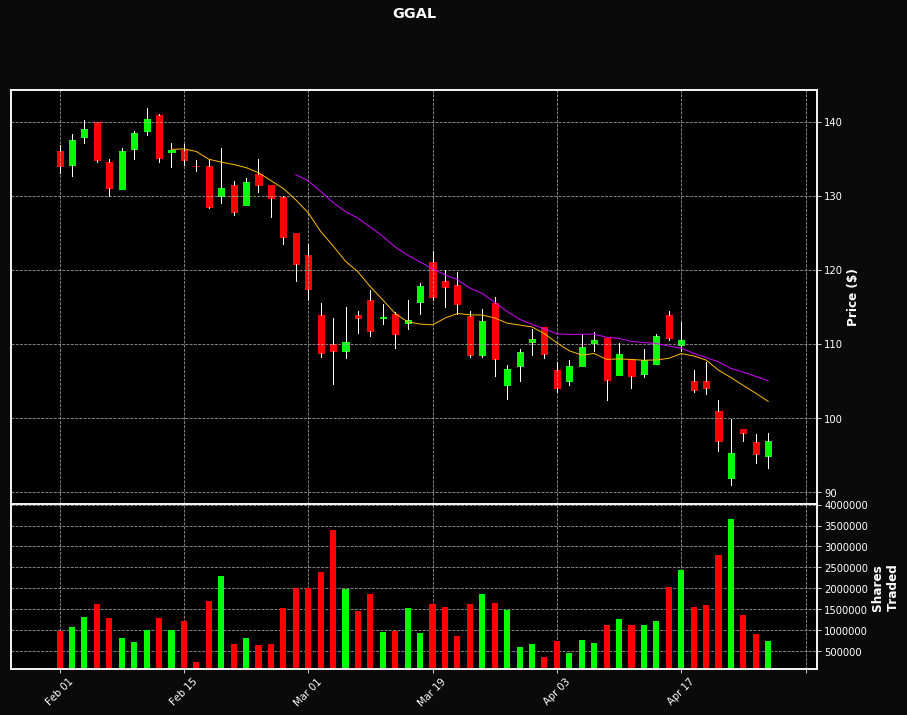

In [3]:
mff.plot_candlestick(data["2019-02":"2019-04"], cant_mav=2, MA1=10, MA2=20)

MA10 at start date is: 129.62500149999997 and MA20 at start date is: 128.08500175


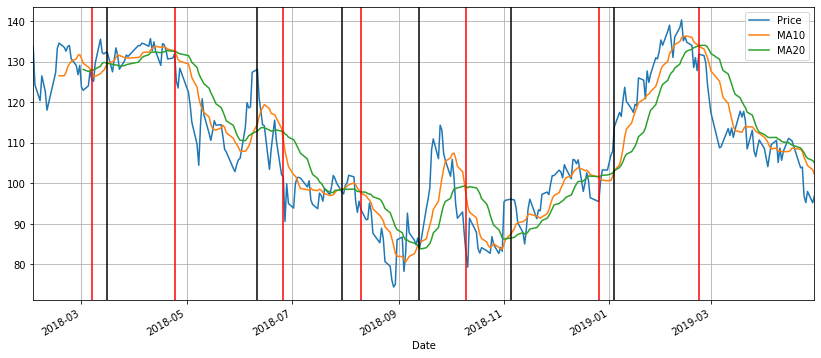

In [5]:
ma10 = data["2018-02":"2019-04"]["Close"].rolling(window = 10).mean()
ma20 = data["2018-02":"2019-04"]["Close"].rolling(window = 20).mean()

buy_dates = []
sell_dates = []

start_date = "2018-03-02"
end_date = "2019-04-30"

ma10_previous_date = ma10[start_date]
ma20_previous_date = ma20[start_date]

print("MA10 at start date is: {} and MA20 at start date is: {}".format(ma10_previous_date,ma20_previous_date))

for date in data[start_date:end_date].index:
    if (ma10[date] >= ma20[date]) and (ma10_previous_date <= ma20_previous_date):
        buy_dates.append(date)
    elif ma10[date] <= ma20[date] and ma10_previous_date >= ma20_previous_date :
        sell_dates.append(date)
    ma10_previous_date = ma10[date]
    ma20_previous_date = ma20[date]
    

ax = data["2018-02":"2019-04"]["Close"].plot(figsize = (14,6), legend = True)
ax.plot(ma10)
ax.plot(ma20)
for i in buy_dates:
    plt.axvline(i, color = 'k')
for i in sell_dates:
    plt.axvline(i, color = 'r')
ax.legend(('Price','MA10','MA20'))
ax.grid()

In [6]:
sell_dates

[Timestamp('2018-03-07 00:00:00'),
 Timestamp('2018-04-24 00:00:00'),
 Timestamp('2018-06-26 00:00:00'),
 Timestamp('2018-08-10 00:00:00'),
 Timestamp('2018-10-10 00:00:00'),
 Timestamp('2018-12-26 00:00:00'),
 Timestamp('2019-02-22 00:00:00')]

In [7]:
account = 0

k = 1
for i in buy_dates:
    buy_price = data.loc[str(i)]["Close"]
    sell_price = data.loc[str(sell_dates[k])]["Close"]
    profit = sell_price - buy_price
    account += profit
    print("Buy date: {}, Buy Price: {}  --  Sell date: {}, Sell Price: {}  --  Profit: {}".format(str(i.date()),
                                                                                                 buy_price,
                                                                                                 str(sell_dates[k].date()),
                                                                                                 sell_price,
                                                                                                 profit))
    k+=1
    
account

Buy date: 2018-03-16, Buy Price: 132.25  --  Sell date: 2018-04-24, Sell Price: 131.949997  --  Profit: -0.3000030000000038
Buy date: 2018-06-11, Buy Price: 128.100006  --  Sell date: 2018-06-26, Sell Price: 101.699997  --  Profit: -26.40000900000001
Buy date: 2018-07-30, Buy Price: 97.900002  --  Sell date: 2018-08-10, Sell Price: 93.599998  --  Profit: -4.300004000000001
Buy date: 2018-09-13, Buy Price: 84.099998  --  Sell date: 2018-10-10, Sell Price: 82.650002  --  Profit: -1.4499959999999987
Buy date: 2018-11-05, Buy Price: 96.099998  --  Sell date: 2018-12-26, Sell Price: 95.5  --  Profit: -0.5999979999999994
Buy date: 2019-01-04, Buy Price: 113.949997  --  Sell date: 2019-02-22, Sell Price: 131.850006  --  Profit: 17.90000900000001


-15.150001000000003